In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
library(parallel)
library(ggpubr)
library(rstatix)
library(parallel)
library(ggpubr)
library(anndata)
library(ggsci)
library(ggrepel)
library(patchwork)
library(pheatmap)
library(aplot)



Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate



Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter




In [3]:
mean_df<-read.csv("mean_df.csv")

In [25]:
colnames(mean_df)

[1] "X.2"                                   
 [2] "TLR4"                                  
 [3] "Samples"                               
 [4] "pbmc_sample_id"                        
 [5] "AIFI_L3"                               
 [6] "ImmuneType"                            
 [7] "Unnamed..0"                            
 [8] "X.1"                                   
 [9] "X"                                     
[10] "lastUpdated"                           
[11] "sample.id"                             
[12] "sample.bridgingControl"                
[13] "sample.sampleKitGuid"                  
[14] "sample.visitName"                      
[15] "sample.visitDetails"                   
[16] "sample.drawDate"                       
[17] "sample.daysSinceFirstVisit"            
[18] "file.id"                               
[19] "file.name"                             
[20] "file.batchID"                          
[21] "file.panel"                            
[22] "file.pool"                             
[23] "file.fileType"                         
[24] "file.majorVersion"                     
[25] "subject.id"                            
[26] "subject.biologicalSex"                 
[27] "subject.birthYear"                     
[28] "subject.ethnicity"                     
[29] "subject.partnerCode"                   
[30] "subject.race"                          
[31] "subject.subjectGuid"                   
[32] "cohort.cohortGuid"                     
[33] "sample.diseaseStatesRecordedAtVisit"   
[34] "Sample_ID"                             
[35] "Sample_Draw_date"                      
[36] "Covid_Dose_1"                          
[37] "Covid_Dose_2"                          
[38] "Covid_exlcusion"                       
[39] "CMV.IgG.Serology.Result.Interpretation"
[40] "BMI"                                   
[41] "file.name.downloaded"                  
[42] "file.path"                             
[43] "Flu_Year"                              
[44] "Strains_concat"

In [28]:
write.csv(mean_df[c("ImmuneType",'TLR4','AIFI_L3','pbmc_sample_id','subject.biologicalSex','subject.birthYear',
          'subject.ethnicity','subject.partnerCode',
          'subject.race','subject.subjectGuid','cohort.cohortGuid')],"mean_df.csv")

Warning message in wilcox.test.default(c(0.153176605701447, 0, 0.309869468212128, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.153176605701447, 0, 0.309869468212128, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.153176605701447, 0, 0.309869468212128, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0.0403842546723106, 0.0944559303196994, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0.0403842546723106, 0.0944559303196994, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0.143207117915154, 0, 0, 0, 0, 0.220017328858376, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“cannot comput

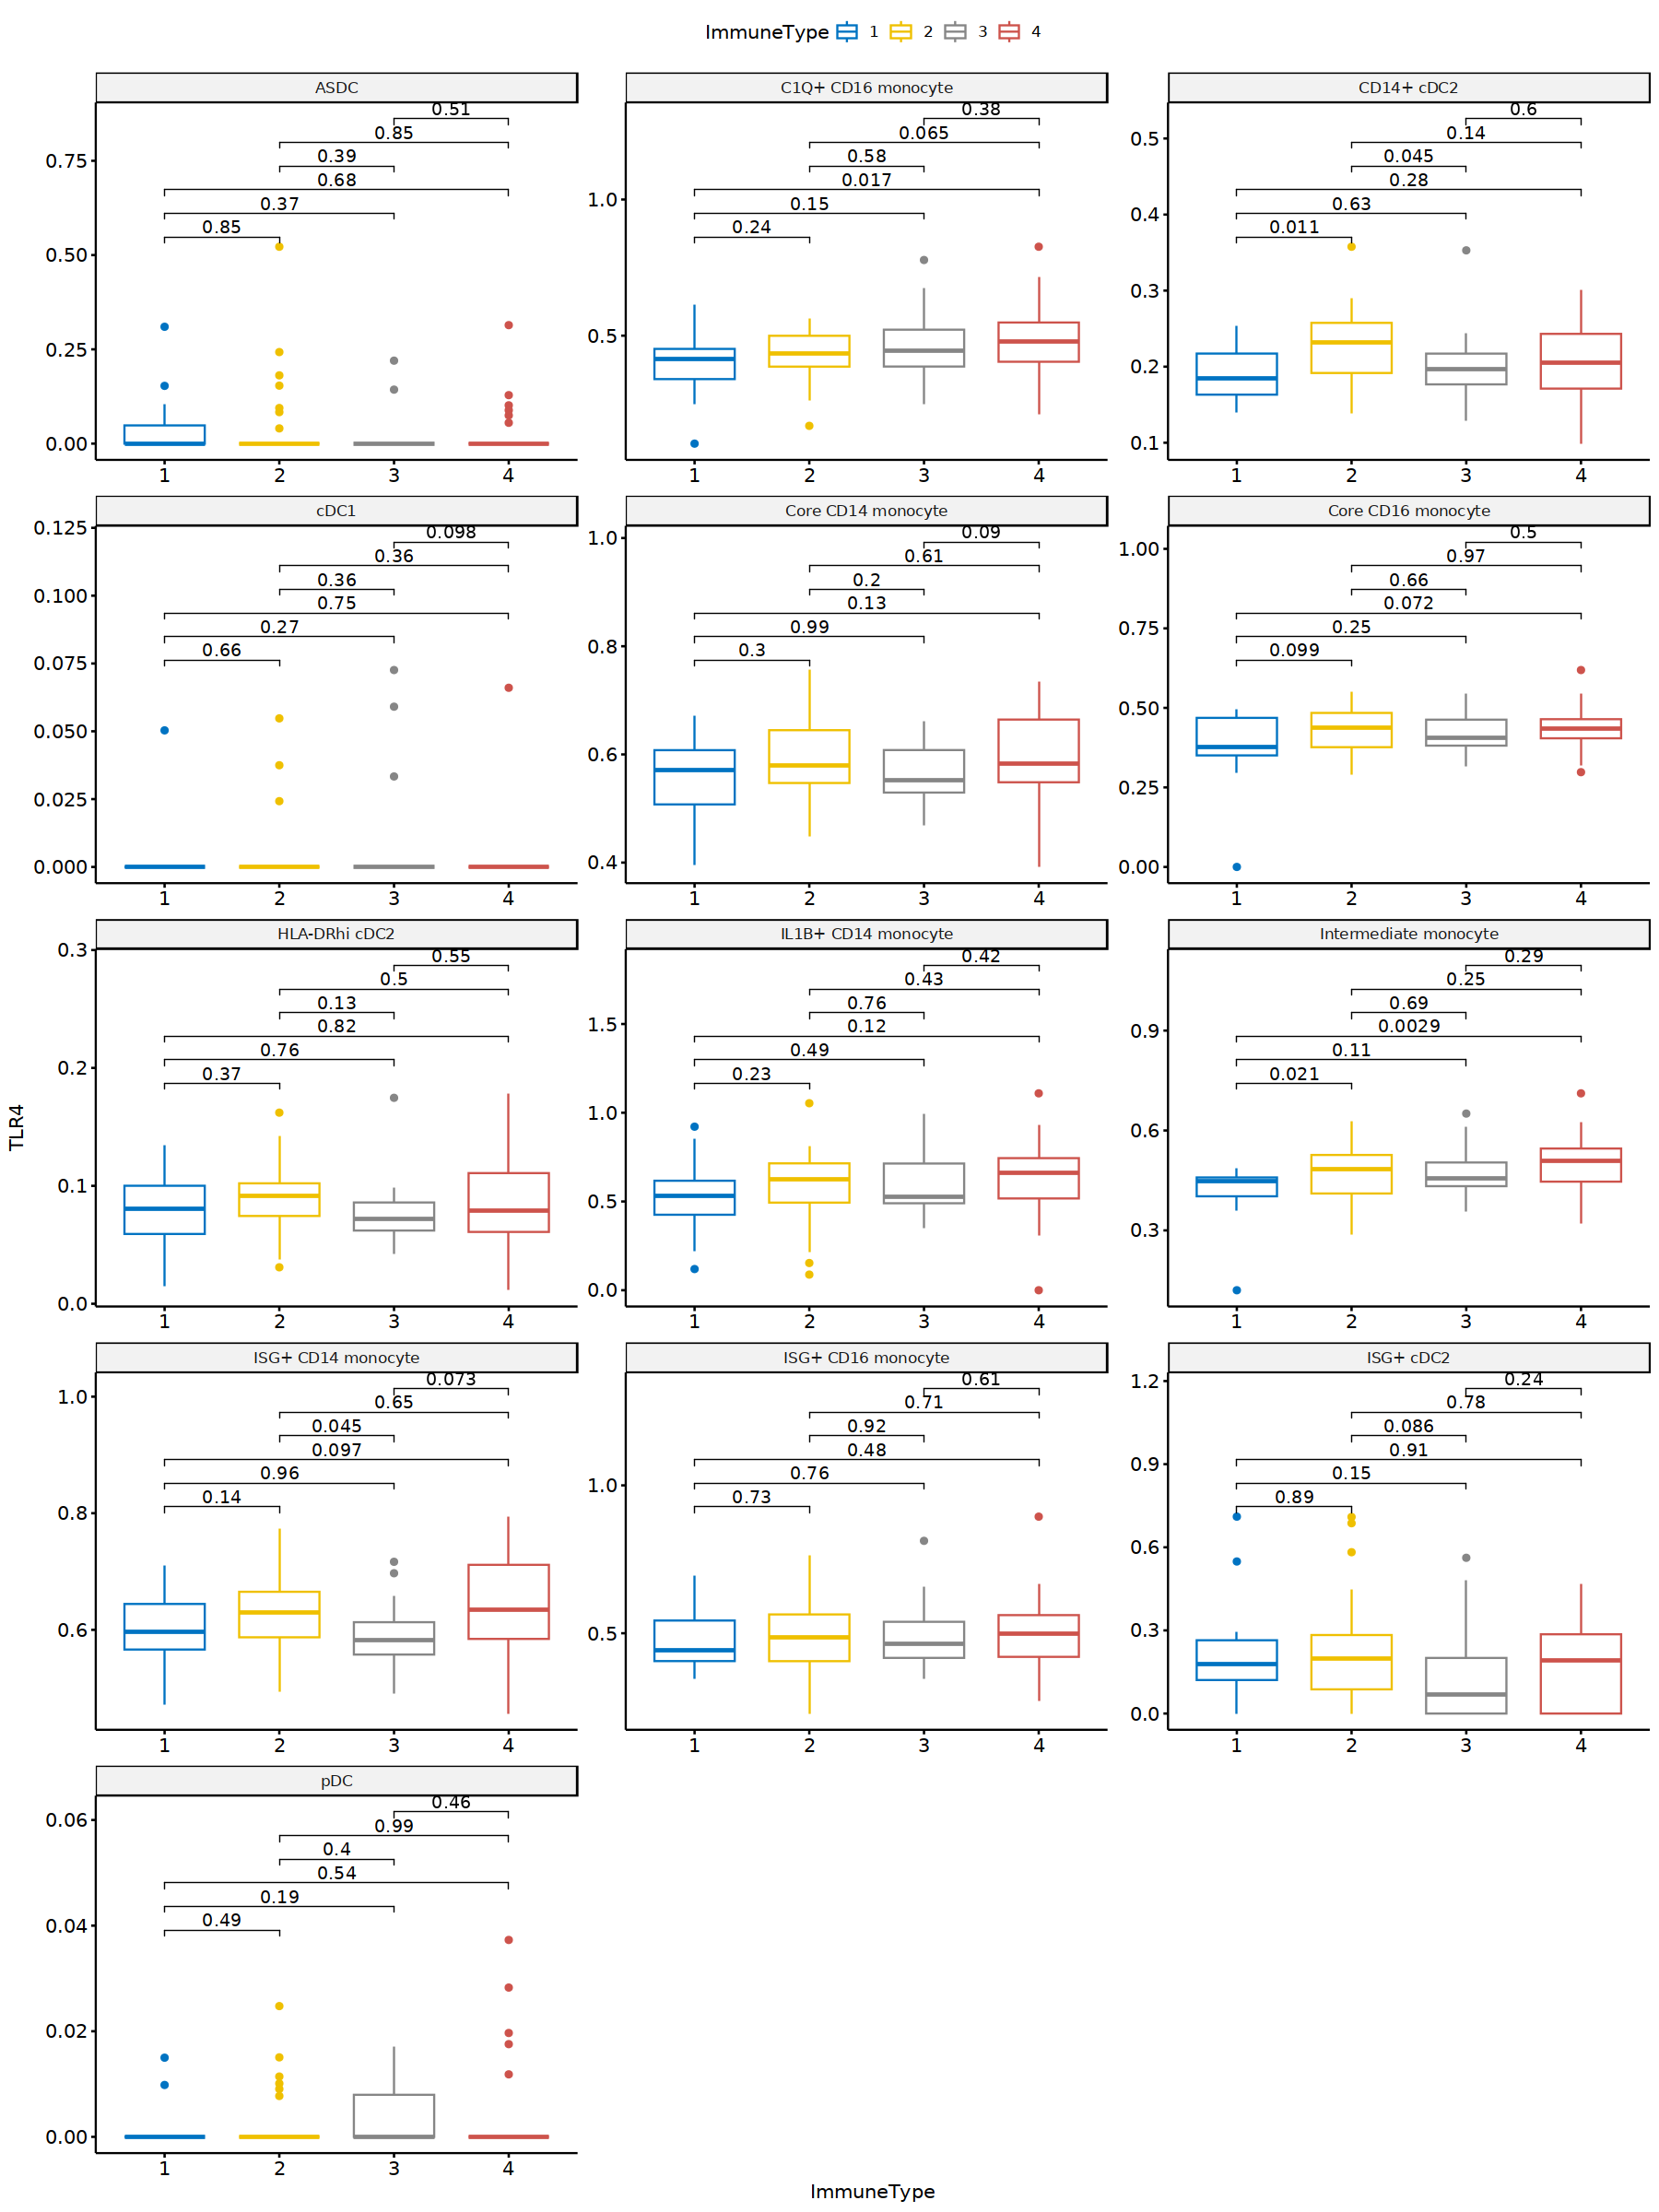

In [24]:
options(repr.plot.width = 15, repr.plot.height = 20)
my_comparisons <- list( c(1, 2), c(1, 3), c(1, 4), c(2, 3) , c(2, 4) , c(3, 4)  )
ggboxplot(mean_df, x = "ImmuneType", y = "TLR4",
          color = "ImmuneType", palette = "jco")+ 
  stat_compare_means(comparisons = my_comparisons,label = "p.format", size = 4, method = "wilcox.test")+facet_wrap(~AIFI_L3,ncol=3,scale='free')
